### **Initial Data Insights**

1. **Dataset Overview**:
   - The dataset contains both numerical and categorical columns.
   - The `.info()` function provides information about the number of non-null entries in each column and the data types.
   
2. **Summary Statistics**:
   - Summary statistics for numerical columns are provided using the `.describe()` function.
   - This includes metrics like mean, standard deviation, min, and max for numerical columns such as `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`.
   
3. **Numerical and Categorical Columns**:
   - **Numerical columns**: These are features like `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`.
   - **Categorical columns**: These are features like `species`, `island`, and `sex`.
   
4. **Value Counts for Categorical Columns**:
   - We get the count of unique values in categorical columns like `species`, `island`, and `sex`. This helps us understand the distribution of categories.
   
5. **Missing Values**:
   - A check is performed to identify missing values in each column. This gives a sense of which features might require imputation or special handling in later steps.

In [50]:
import pandas as pd

file_path = 'dataset.csv'
df = pd.read_csv(file_path)

print("=======================================================")
print("          Dataset Overview          ")
print("=======================================================\n")


print("First 5 rows of the dataset:")
print(df.head(), "\n")

print("=======================================================")
print("        Dataset General Info        ")
print("=======================================================\n")

print(f"Total entries: {len(df)} rows, {len(df.columns)} columns\n")

print("Numerical Columns and Missing Values:")
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
for col in numerical_columns:
    missing = df[col].isnull().sum()
    print(f" - {col}: Missing Values = {missing}")
print("\n")

print("Categorical Columns and Unique Values:")
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
for col in categorical_columns:
    unique_vals = df[col].nunique()
    missing = df[col].isnull().sum()
    print(f" - {col}: {unique_vals} unique values, Missing Values = {missing}")
print("\n")

          Dataset Overview          

First 5 rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female   

        Dataset General Info        

Total entries: 344 rows, 7 columns

Numerical Columns and Missing Values:
 - bill_length_mm: Missing Values = 7
 - bill_depth_mm: Missing Values = 2
 - flipper_length_mm: Missing Values = 2
 - body_mass_g: Missing Values = 2


Categorical Columns and Unique Values:
 - species: 3 unique values, Mis

In [51]:
print("=======================================================")
print("   Summary Statistics for Numerical Columns   ")
print("=======================================================\n")
summary_stats = df.describe().round(2)
summary_stats.loc['count'] = summary_stats.loc['count'].astype(int)  
print(summary_stats, "\n")

print("=======================================================")
print("      Value Counts for Categorical Columns    ")
print("=======================================================\n")
for col in categorical_columns:
    print(f"\nValue counts for '{col}':\n{df[col].value_counts()}\n")

   Summary Statistics for Numerical Columns   

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count          337.00         342.00             342.00       342.00
mean            43.88          17.15             200.92      4273.98
std              5.48           1.97              14.06      1119.23
min             32.10          13.10             172.00      2700.00
25%             39.20          15.60             190.00      3550.00
50%             44.10          17.30             197.00      4050.00
75%             48.50          18.70             213.00      4793.75
max             59.60          21.50             231.00     15000.00 

      Value Counts for Categorical Columns    


Value counts for 'species':
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


Value counts for 'island':
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


Value counts for 'sex':
sex
male       164
female   

In [52]:
print("=======================================================")
print("          Missing Values Summary          ")
print("=======================================================\n")
print(df.isnull().sum())

          Missing Values Summary          

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


#### **Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it**

#### 1. **Missing Value Handling**:
- Rows with more than half of their columns missing values are removed based on a **threshold**.
- Missing values in numerical columns are imputed using **KNN Imputer** to capture patterns in the data.
- Missing values in categorical columns are imputed using **Simple Imputer with mode**, including handling 'unknown' in the `sex` column.

#### 2. **Imputation**:
- **KNN Imputer** fills missing numerical values using neighboring data points for better accuracy.
- **Simple Imputer (Mode)** fills missing categorical values by replacing them with the most frequent category, ensuring consistent categorical data.

#### 3. **Handling 'Unknown' Values**:
- `'Unknown'` in `sex` is replaced with the mode of the column, ensuring consistency in categorical data.

#### 4. **Categorical and Numerical Data Cleaning**:
- Categorical columns are standardized by converting all string values to lowercase.
- Invalid (negative) values in numerical columns are removed to avoid data misrepresentation.

#### 5. **Final Dataset**:
- Duplicate rows are removed, and the cleaned dataset is printed with all missing values handled.

#### **Benefits**:
- **Threshold for Missing Values**: Prevents skewing the dataset with incomplete rows.
- **Improved Imputation**: KNN Imputer provides more accurate results for numerical data.
- **Consistency**: 'Unknown' values are handled correctly, and both categorical and numerical columns are cleaned.

#### **Data Integrity**:
By removing rows with excessive missing data and replacing missing values intelligently, the dataset becomes cleaner, ensuring **better analysis and modeling**.

In [53]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path)

threshold = len(df.columns) / 2

# Identify rows where the number of missing values is greater than the threshold
rows_to_remove = df[df.isnull().sum(axis=1) > threshold]

print("Rows with more than threshold missing values:")
print(rows_to_remove)

# Remove rows where the number of missing values is greater than the threshold
df_cleaned = df[df.isnull().sum(axis=1) <= threshold]

df_cleaned = df_cleaned.reset_index(drop=True)

# 1. Automatically identify numerical and categorical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

# Replace 'unknown' in 'sex' column with mode
def replace_unknown_with_mode(df, column_name):
    mode_value = df[column_name].mode()[0]
    df[column_name] = df[column_name].replace('unknown', mode_value)

# Convert categorical columns to lowercase
def clean_categorical_columns(df, categorical_columns):
    for col in categorical_columns:
        # Convert strings to lowercase to avoid inconsistencies (e.g., 'Male' vs 'male')
        if df[col].dtype == 'object':
            df.loc[:, col] = df[col].str.lower()

# Standardize categorical columns
clean_categorical_columns(df_cleaned, categorical_columns)

# Now replace 'unknown' in the 'sex' column with the mode value
replace_unknown_with_mode(df_cleaned, 'sex')

# 2. Impute missing values using more advanced techniques

# For numerical columns, use KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df_cleaned[numerical_columns] = knn_imputer.fit_transform(df_cleaned[numerical_columns])

# For categorical columns, use Simple Imputer with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_columns] = categorical_imputer.fit_transform(df_cleaned[categorical_columns])

# Check for remaining missing values
print("\nRemaining missing values after imputation:")
print(df_cleaned.isnull().sum())

# 3. Clean and correct the data

# Function to check for unique values in categorical columns
def check_unique_values(df, categorical_columns):
    for col in categorical_columns:
        print(f"\nUnique values in '{col}':")
        print(df[col].unique())

# Check for invalid numerical values (e.g., negative values)
def clean_numerical_columns(df, numerical_columns):
    for col in numerical_columns:
        # Remove invalid (negative) values
        invalid_data = df[df[col] < 0]
        if not invalid_data.empty:
            print(f"\nInvalid (negative) values in '{col}', removing them:")
            print(invalid_data)
            df = df[df[col] >= 0]
    return df

# Check for data type inconsistencies
def check_inconsistent_data(df, numerical_columns, categorical_columns):
    inconsistent_rows = pd.DataFrame()
    
    # Check if categorical columns have non-string values
    for col in categorical_columns:
        if df[col].dtype == 'object':
            inconsistent = df[~df[col].apply(lambda x: isinstance(x, str))]
            inconsistent_rows = pd.concat([inconsistent_rows, inconsistent])
    
    # Check if numerical columns have non-numeric values
    for col in numerical_columns:
        inconsistent = df[~pd.to_numeric(df[col], errors='coerce').notnull()]
        inconsistent_rows = pd.concat([inconsistent_rows, inconsistent])
    
    return inconsistent_rows

# Remove rows with data type inconsistencies
def remove_inconsistent_data(df, inconsistent_rows):
    if not inconsistent_rows.empty:
        print("\nRows with inconsistent data types (will be removed):")
        print(inconsistent_rows)
        df = df.drop(inconsistent_rows.index)
    else:
        print("\nAll data is consistent.")
    
    return df

# Clean numerical columns and remove invalid values
df_cleaned = clean_numerical_columns(df_cleaned, numerical_columns)

# Check for inconsistent data types
inconsistent_rows = check_inconsistent_data(df_cleaned, numerical_columns, categorical_columns)

# Remove inconsistent rows
df_cleaned = remove_inconsistent_data(df_cleaned, inconsistent_rows)

# Check for duplicates and remove them
duplicates = df_cleaned[df_cleaned.duplicated()]
if not duplicates.empty:
    print("\nDuplicate rows (will be removed):")
    print(duplicates)
    df_cleaned = df_cleaned.drop_duplicates()
else:
    print("\nNo duplicates found.")

check_unique_values(df_cleaned,categorical_columns)


Rows with more than threshold missing values:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
271          NaN  NaN  
Numerical columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Categorical columns: ['species', 'island', 'sex']

Remaining missing values after imputation:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

All data is consistent.

No duplicates found.

Unique values in 'species':
['adelie' 'gentoo' 'chinstrap']

Unique values in 'island':
['torgersen' 'biscoe' 'dream']

Unique values in 'sex':
['male' 'female']


In [54]:
df_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,adelie,torgersen,39.1,18.7,181.0,3750.0,male
1,adelie,torgersen,39.5,17.4,186.0,3800.0,female
2,adelie,torgersen,40.3,18.0,195.0,3250.0,female
3,adelie,torgersen,36.7,19.3,193.0,3450.0,female
4,adelie,torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
337,chinstrap,dream,55.8,19.8,207.0,4000.0,male
338,chinstrap,dream,43.5,18.1,202.0,3400.0,female
339,chinstrap,dream,49.6,18.2,193.0,3775.0,male
340,chinstrap,dream,50.8,19.0,210.0,4100.0,male


#### **Q2: What is the average body_mass_g for Gentoo penguins? (code)**

In [55]:
average_body_mass_gentoo = df_cleaned[df_cleaned['species'] == 'gentoo']['body_mass_g'].mean()

print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass_gentoo:.2f} grams")

The average body_mass_g for Gentoo penguins is: 5133.74 grams


#### **Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)**

1. **Visualizing Distributions (Histograms & KDE)**:
   - **Purpose**: The first part of the code uses histograms with KDE (Kernel Density Estimates) to visualize the distribution of `bill_length_mm` and `bill_depth_mm` for different penguin species.
   - **Key Plots**: The `sns.histplot()` function plots the distributions of each feature, color-coded by species, while `stat='density'` ensures the y-axis represents probability density rather than raw counts. KDE overlays give a smoother, continuous approximation of the distribution.

2. **Scatter Plot**:
   - **Purpose**: The scatter plot shows the relationship between `bill_length_mm` and `bill_depth_mm` for each penguin species. The `sns.scatterplot()` function is used, and each species is represented by a different color and style (markers).
   - **Why?**: This allows us to visualize whether species with longer bills also tend to have deeper bills and whether the relationship is similar across species.

3. **Skewness and Kurtosis Calculation**:
   - **Purpose**: Skewness and kurtosis are calculated for `bill_length_mm` and `bill_depth_mm` for each species using the `skew()` and `kurtosis()` functions.
   - **Skewness**: Indicates whether the distribution is symmetrical or skewed (left or right).
   - **Kurtosis**: Measures the "tailedness" of the distribution, indicating whether the data has more or fewer extreme values (outliers).

### Skewness and Kurtosis (Brief Explanation):

- **Skewness**: Measures the asymmetry of a distribution.
   - **Positive Skew**: Long right tail, more smaller values.
   - **Negative Skew**: Long left tail, more larger values.
   - **0 Skewness**: Symmetrical distribution.

- **Kurtosis**: Measures how heavy or light the tails of a distribution are.
   - **Positive Kurtosis**: Heavier tails, more extreme values.
   - **Negative Kurtosis**: Lighter tails, fewer extreme values.
   - **0 Kurtosis**: Similar to a normal distribution.

- **Positive Skewness** in bill length means more penguins have shorter bills, while a **negative kurtosis** means there are fewer extreme values in the dataset.

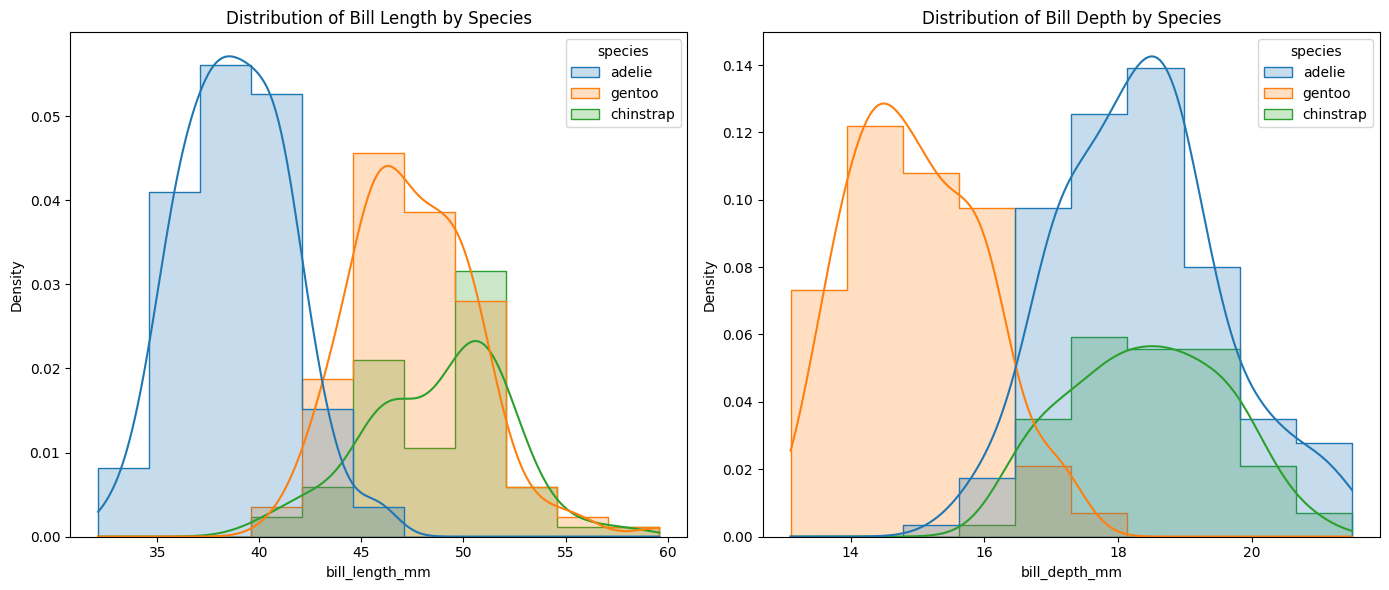

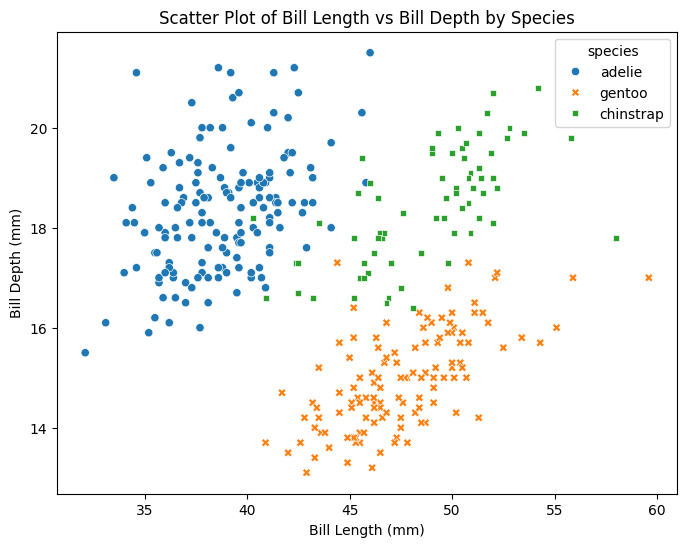


Species: Adelie
Bill Length - Skewness: 0.16, Kurtosis: -0.19
Bill Depth - Skewness: 0.32, Kurtosis: -0.10

Species: Gentoo
Bill Length - Skewness: 0.64, Kurtosis: 1.17
Bill Depth - Skewness: 0.32, Kurtosis: -0.61

Species: Chinstrap
Bill Length - Skewness: -0.22, Kurtosis: 0.01
Bill Depth - Skewness: 0.01, Kurtosis: -0.90


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# 1. Visualize the distribution of bill_length_mm and bill_depth_mm for different species

# Set up the figure for histograms and KDE
plt.figure(figsize=(14, 6))

# Plot distribution of bill_length_mm
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='bill_length_mm', hue='species', kde=True, element='step', stat='density')
plt.title('Distribution of Bill Length by Species')

# Plot distribution of bill_depth_mm
plt.subplot(1, 2, 2)
sns.histplot(data=df_cleaned, x='bill_depth_mm', hue='species', kde=True, element='step', stat='density')
plt.title('Distribution of Bill Depth by Species')

plt.tight_layout()
plt.show()

# 2. Visualize the relationship between bill_length_mm and bill_depth_mm using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species')
plt.title('Scatter Plot of Bill Length vs Bill Depth by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# 3. Analyze skewness and kurtosis for bill_length_mm and bill_depth_mm by species
species_list = df_cleaned['species'].unique()

for species in species_list:
    subset = df_cleaned[df_cleaned['species'] == species]
    bill_length_skew = skew(subset['bill_length_mm'].dropna())
    bill_length_kurt = kurtosis(subset['bill_length_mm'].dropna())
    bill_depth_skew = skew(subset['bill_depth_mm'].dropna())
    bill_depth_kurt = kurtosis(subset['bill_depth_mm'].dropna())
    
    print(f"\nSpecies: {species.capitalize()}")
    print(f"Bill Length - Skewness: {bill_length_skew:.2f}, Kurtosis: {bill_length_kurt:.2f}")
    print(f"Bill Depth - Skewness: {bill_depth_skew:.2f}, Kurtosis: {bill_depth_kurt:.2f}")


### **Function to Visualize Distribution with Skewness and Kurtosis:**

- The function `plot_with_skew_kurt()` creates a **histogram with KDE** for the given feature (`bill_length_mm` or `bill_depth_mm`), color-coded by species.
  
- **Skewness and Kurtosis Calculation**: For each species, **skewness** and **kurtosis** are calculated using `scipy.stats.skew()` and `scipy.stats.kurtosis()`. These metrics are annotated on the plot for each species.

- **Mean Line**: A **vertical dashed line** is drawn at the mean value of the feature for each species, indicating the central tendency of the data.

- **Skewness and Kurtosis Annotation**: The **skewness** and **kurtosis** values are displayed next to the mean line on the plot, providing a visual summary of the distribution’s asymmetry (skewness) and tail heaviness (kurtosis).

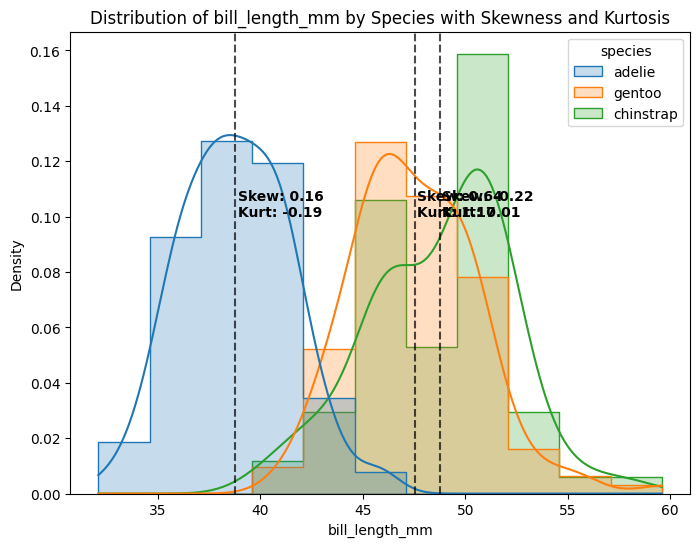

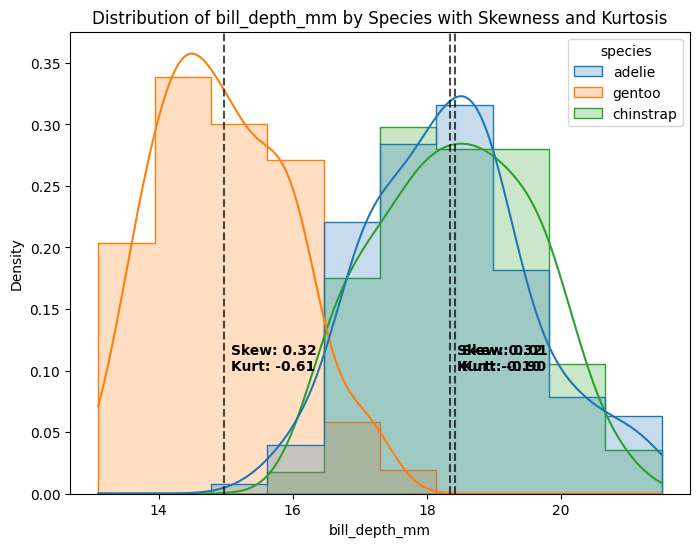

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# 1. Visualize the distribution of bill_length_mm and bill_depth_mm with skewness and kurtosis annotations

# Define a function to plot histograms with KDE, and annotate skewness and kurtosis
def plot_with_skew_kurt(df, feature, species):
    plt.figure(figsize=(8, 6))
    
    # Plot the KDE for each species
    sns.histplot(data=df, x=feature, hue=species, kde=True, stat="density", element="step", common_norm=False)
    
    # Calculate skewness and kurtosis for each species
    for spec in df[species].unique():
        subset = df[df[species] == spec]
        feature_skew = skew(subset[feature].dropna())
        feature_kurt = kurtosis(subset[feature].dropna())
        feature_mean = subset[feature].mean()

        # Add vertical line for the mean
        plt.axvline(feature_mean, linestyle='--', color='black', alpha=0.7)
        
        # Annotate the skewness and kurtosis on the plot
        plt.text(feature_mean + 0.1, 0.1, f'Skew: {feature_skew:.2f}\nKurt: {feature_kurt:.2f}', 
                 horizontalalignment='left', size='medium', color='black', weight='semibold')
    
    plt.title(f'Distribution of {feature} by Species with Skewness and Kurtosis')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.show()

# Plot for bill_length_mm
plot_with_skew_kurt(df_cleaned, 'bill_length_mm', 'species')

# Plot for bill_depth_mm
plot_with_skew_kurt(df_cleaned, 'bill_depth_mm', 'species')


#### **Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)**

#### Method to Detect Outliers:

One common method to detect outliers is using the **Interquartile Range (IQR)**. The IQR method identifies outliers as data points that lie **below the first quartile (Q1)** by **1.5 times the IQR**, or **above the third quartile (Q3)** by **1.5 times the IQR**. This method is robust for detecting extreme values that fall significantly outside the typical range of the data.

#### Steps:

1. **Calculate the IQR** for each numerical feature.
2. **Define the outlier bounds** based on the **1.5 * IQR** rule:
    - **IQR**: Q3-Q1
    - **Lower Bound**: \( Q1 - 1.5 * IQR \)
    - **Upper Bound**: \( Q3 + 1.5 * IQR \)
3. **Identify outliers**: Any data points outside these bounds are considered outliers.
4. **Visualize** the outliers using boxplots.

#### Outlier Detection using IQR:

- For each numerical feature (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`), the code calculates the **Interquartile Range (IQR)**.
- **Outliers** are defined as values below \( Q1 - 1.5 * IQR \) or above \( Q3 + 1.5 * IQR \).

#### Visualizing Outliers with Boxplots:

- **Boxplots** are used to visualize the distribution of each feature and highlight the outliers.
- The **red dashed lines** show the **lower and upper bounds** for detecting outliers.
- The plot shows how values for each species deviate and which ones are considered outliers.

Outliers detected in bill_length_mm:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


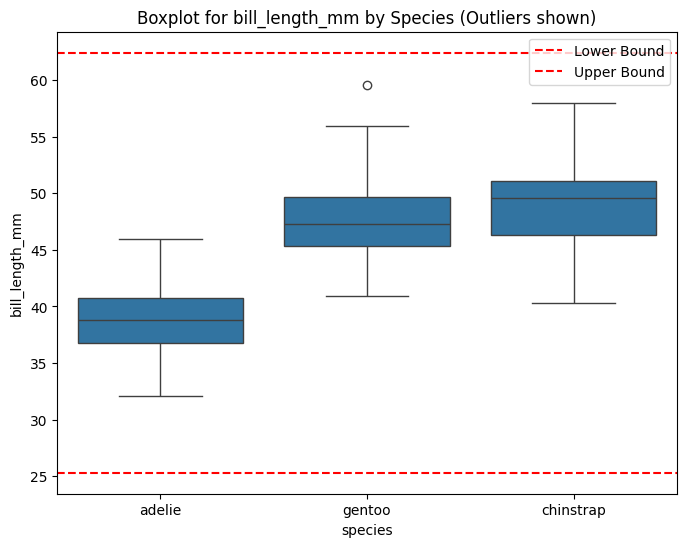

Outliers detected in bill_depth_mm:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


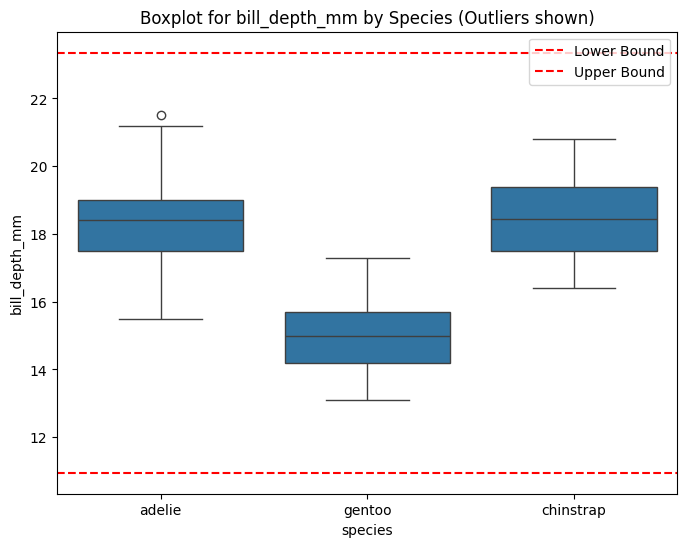

Outliers detected in flipper_length_mm:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


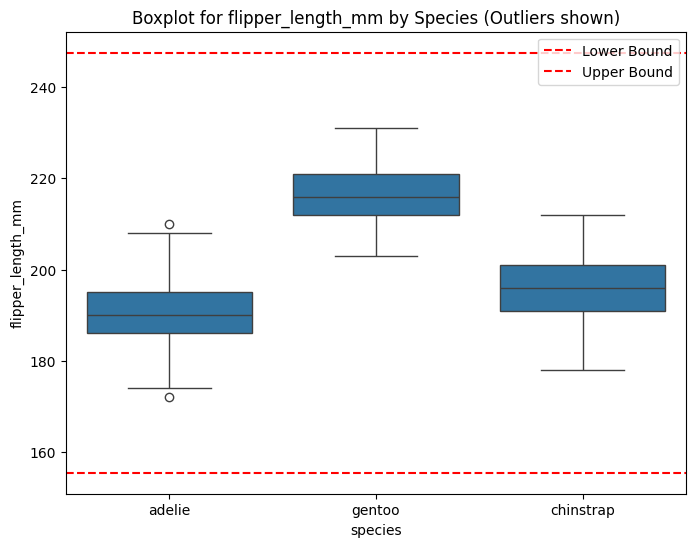

Outliers detected in body_mass_g:
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
72      adelie  torgersen            45.8           18.9              197.0   
205     gentoo     biscoe            46.5           14.4              217.0   
322  chinstrap      dream            51.5           18.7              187.0   

     body_mass_g     sex  
72       15000.0    male  
205      12000.0  female  
322      10000.0    male  


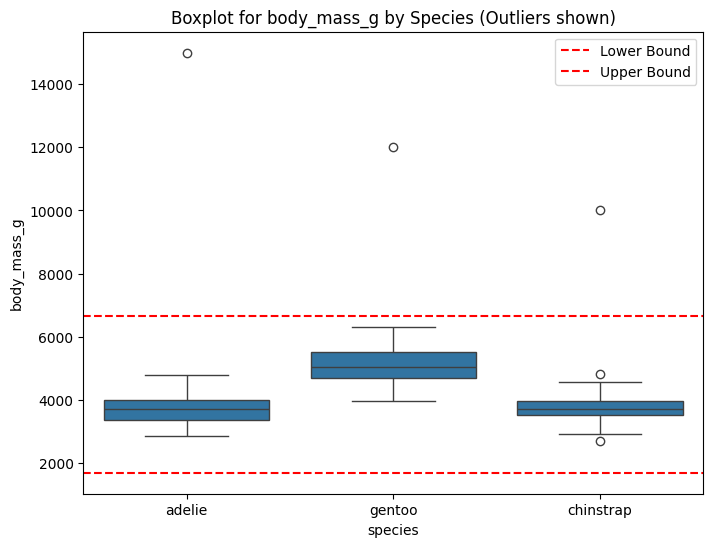

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to calculate IQR and identify outliers for a given feature
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and visualize outliers for each numerical feature
for feature in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers(df_cleaned, feature)
    print(f"Outliers detected in {feature}:")
    print(outliers)

    # Visualize the outliers using a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=feature, data=df_cleaned)
    plt.axhline(lower_bound, linestyle='--', color='red', label='Lower Bound')
    plt.axhline(upper_bound, linestyle='--', color='red', label='Upper Bound')
    plt.title(f"Boxplot for {feature} by Species (Outliers shown)")
    plt.legend()
    plt.show()


#### **Q5: Does this dataset contribute to the curse of dimensionality? If yes, perform PCA.**

#### Curse of Dimensionality:
The **curse of dimensionality** refers to the phenomenon where high-dimensional data becomes sparse, making it harder for machine learning models to find patterns or make accurate predictions. As the number of dimensions (features) increases, the volume of the space increases exponentially, making the data points farther apart and making the data more difficult to analyze.

PCA helps mitigate the curse of dimensionality by reducing the number of dimensions, while still retaining most of the variance in the data.

#### PCA Process:

1. **Data Standardization**:  
   The data is standardized so that each feature has a mean of 0 and variance of 1:  
   $$ 
   X_{\text{standardized}} = \frac{X - \mu}{\sigma} 
   $$  
   where $\mu$ is the mean of the feature and $\sigma$ is the standard deviation.

2. **Covariance Matrix**:  
   After standardizing the data, the covariance matrix is computed to capture the relationship between the features:  
   $$ 
   \text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n}(X_i - \mu_X)(Y_i - \mu_Y)
   $$

3. **Eigenvalues and Eigenvectors**:  
   The eigenvalues and eigenvectors are computed from the covariance matrix. The eigenvalues represent the amount of variance captured by each principal component, and the eigenvectors represent the directions of the new feature space:  
   $$ 
   \text{Covariance Matrix} \times \text{Eigenvector} = \text{Eigenvalue} \times \text{Eigenvector} 
   $$

4. **Selecting Principal Components**:  
   Principal components are selected based on the cumulative explained variance, which is computed by normalizing the eigenvalues:  
   $$ 
   \text{Explained Variance Ratio} = \frac{\text{Eigenvalue}}{\sum \text{Eigenvalues}} 
   $$  
   The number of components is selected based on a threshold (e.g., 95%) of cumulative explained variance:  
   $$ 
   \text{Cumulative Explained Variance} = \sum_{i=1}^{k} \text{Explained Variance Ratio} 
   $$

5. **Projection**:  
   The original data is projected onto the selected principal components:  
   $$ 
   X_{\text{reduced}} = X_{\text{standardized}} \times \text{Eigenvector Subset}
   $$

#### Why PCA is Useful:

1. **Uncorrelated Data**: Principal components are uncorrelated, simplifying the relationships between features and eliminating multicollinearity.
2. **Retaining Variance**: The principal components retain most of the variance from the original data, ensuring that even with fewer dimensions, most information is preserved.
3. **Dimensionality Reduction**: PCA transforms the original features into a smaller set of principal components, helping to avoid the curse of dimensionality.
4. **Easier Interpretation**: The new uncorrelated principal components make the data easier to analyze and visualize.


#### Summary of Visualizations:
- Cumulative Explained Variance Plot shows how much total variance is explained as you add more principal components.
- Comparison of Original vs PCA Data: You can easily compare the spread of data in the original feature space (bill_length_mm vs bill_depth_mm) and the transformed feature space (PC1 vs PC2). This allows you to observe how PCA compresses the data into fewer dimensions while retaining most of the variance.

Covariance Matrix:
[[ 1.00293255 -0.24187838  0.66468676  0.47332183]
 [-0.24187838  1.00293255 -0.58556339 -0.32596169]
 [ 0.66468676 -0.58556339  1.00293255  0.62191757]
 [ 0.47332183 -0.32596169  0.62191757  1.00293255]]

Eigenvalues:
[2.49110062 0.20773549 0.52713857 0.78575552]

Eigenvectors:
[[ 0.48708193 -0.42327548  0.56942349  0.50926019]
 [-0.41827403  0.36808161 -0.10527086  0.82369946]
 [ 0.58782843  0.7977854   0.12750165 -0.04170764]
 [ 0.49219484 -0.22111592 -0.80524423  0.24583271]]

Sorted Eigenvalues:
[2.49110062 0.78575552 0.52713857 0.20773549]

Sorted Eigenvectors (Top Components):
[[ 0.48708193  0.50926019  0.56942349 -0.42327548]
 [-0.41827403  0.82369946 -0.10527086  0.36808161]
 [ 0.58782843 -0.04170764  0.12750165  0.7977854 ]
 [ 0.49219484  0.24583271 -0.80524423 -0.22111592]]

Number of components selected to retain 95.0% variance: 4


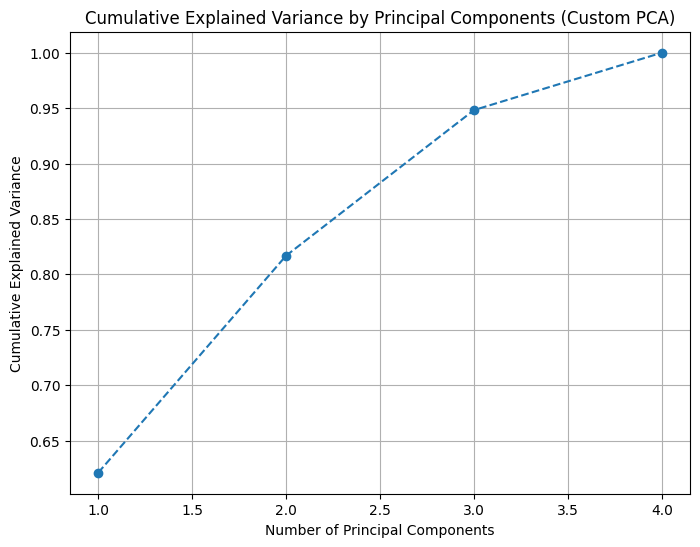

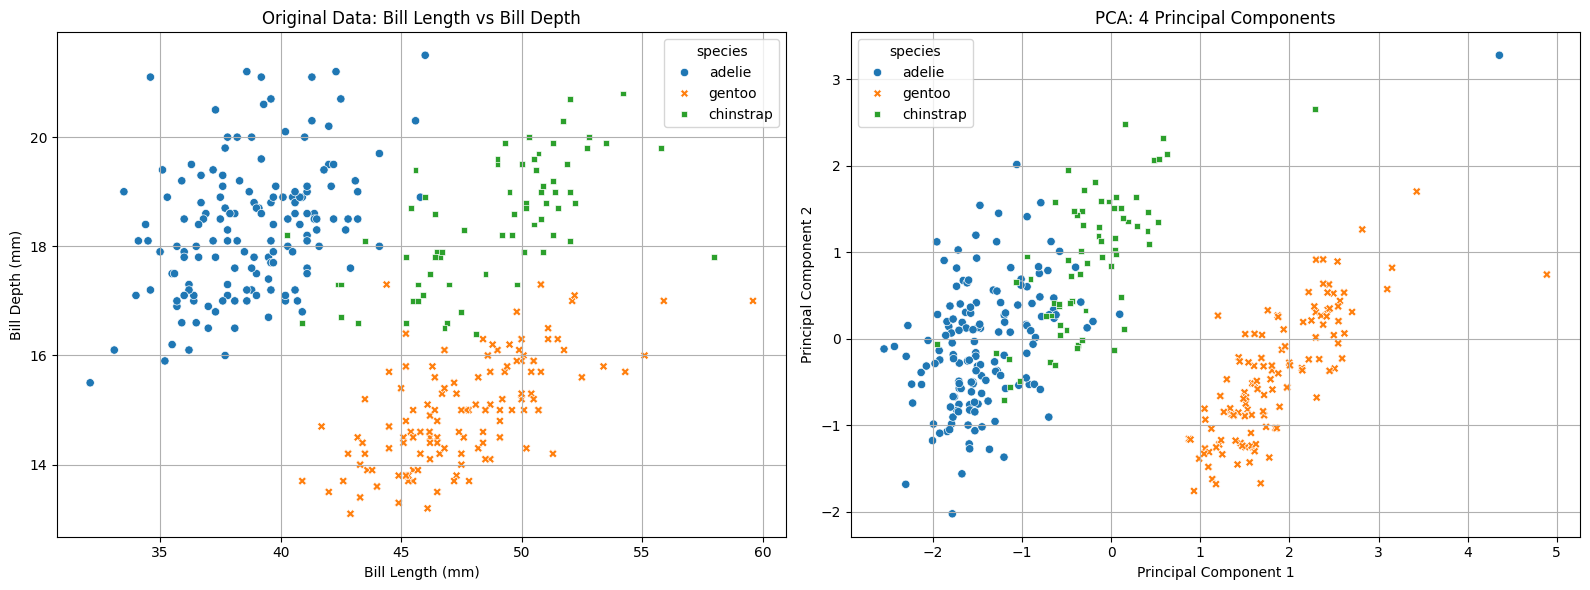

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom PCA Function with dynamic component selection based on explained variance
def custom_pca(X, variance_threshold=0.95):
    # Step 1: Standardize the data (mean = 0, variance = 1)
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Step 2: Calculate covariance matrix
    covariance_matrix = np.cov(X_standardized.T)
    print("Covariance Matrix:")
    print(covariance_matrix)
    
    # Step 3: Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    print("\nEigenvalues:")
    print(eigenvalues)
    print("\nEigenvectors:")
    print(eigenvectors)
    
    # Step 4: Sort eigenvectors by eigenvalues in decreasing order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    print("\nSorted Eigenvalues:")
    print(sorted_eigenvalues)
    print("\nSorted Eigenvectors (Top Components):")
    print(sorted_eigenvectors)

    # Step 5: Calculate the explained variance ratio
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    
    # Step 6: Determine how many components to keep based on the variance threshold
    n_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
    
    print(f"\nNumber of components selected to retain {variance_threshold * 100}% variance: {n_components}")
    
    # Step 7: Select the top n_components
    eigenvector_subset = sorted_eigenvectors[:, :n_components]
    
    # Step 8: Transform the data (project the data onto the new principal components)
    X_reduced = np.dot(X_standardized, eigenvector_subset)
    
    return X_reduced, sorted_eigenvalues, covariance_matrix, cumulative_explained_variance, n_components

# Applying custom PCA to the numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['species', 'island', 'sex']

X = df_cleaned[numerical_columns].values

# Perform custom PCA with a variance threshold (e.g., 95%)
X_reduced, eigenvalues, covariance_matrix, cumulative_explained_variance, n_components = custom_pca(X, variance_threshold=0.95)

# Cumulative Explained Variance Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components (Custom PCA)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Add the selected principal components to the DataFrame for visualization
df_pca = pd.DataFrame(data=X_reduced[:, :2], columns=[f'PC{i+1}' for i in range(2)])  # Visualize only the first 2 PCs
df_pca[categorical_columns] = df_cleaned[categorical_columns]  # Add categorical columns back for comparison

# Create subplots to compare the original data and the PCA-transformed data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Original data scatter plot (e.g., bill_length_mm vs. bill_depth_mm)
sns.scatterplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', ax=axes[0])
axes[0].set_title('Original Data: Bill Length vs Bill Depth')
axes[0].set_xlabel('Bill Length (mm)')
axes[0].set_ylabel('Bill Depth (mm)')
axes[0].grid(True)

# 2. PCA scatter plot (PC1 vs. PC2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', style='species', ax=axes[1])
axes[1].set_title(f'PCA: {n_components} Principal Components')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()


In [60]:
print("\nOriginal df_cleaned:")
print(df_cleaned.head()) 
print("\nNew df_pca (with principal components and categorical columns):")
print(df_pca.head())  


Original df_cleaned:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  adelie  torgersen            39.1           18.7              181.0   
1  adelie  torgersen            39.5           17.4              186.0   
2  adelie  torgersen            40.3           18.0              195.0   
3  adelie  torgersen            36.7           19.3              193.0   
4  adelie  torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3       3450.0  female  
4       3650.0    male  

New df_pca (with principal components and categorical columns):
        PC1       PC2 species     island     sex
0 -1.823058  0.141275  adelie  torgersen    male
1 -1.280319 -0.368346  adelie  torgersen  female
2 -1.201744 -0.190898  adelie  torgersen  female
3 -1.793934  0.066673  adelie  torgersen  female
4 -1.875517  0.904842  adelie  torgersen    male


### **Q6: Use `bill_length_mm` vs `bill_depth_mm` and plot 7 different graphs to visualize them.**

#### 1. **Scatter Plot**:
- A **scatter plot** visually shows the relationship between `bill_length_mm` and `bill_depth_mm` for each species. The species are differentiated by color and style.
- **Insight**: This plot helps you visualize how closely or widely different species' bill measurements cluster together.

#### 2. **KDE Plot (Kernel Density Estimate)**:
- The **KDE plot** (Kernel Density Estimate) provides smoothed density estimates for `bill_length_mm` and `bill_depth_mm`. It gives an idea of where the most data points are concentrated.
- **Insight**: This plot highlights regions of high-density data, indicating where species' measurements are most likely to fall.

#### 3. **Hexbin Plot**:
- The **hexbin plot** is a binned scatter plot where `bill_length_mm` and `bill_depth_mm` are divided into hexagonal bins. The color intensity shows the count of points in each bin.
- **Insight**: It provides a clearer understanding of where data points cluster when many data points overlap.

#### 4. **Box Plot**:
- A **box plot** compares the distribution of `bill_length_mm` for different species, showing the median, quartiles, and any potential outliers.
- **Insight**: It allows you to compare the distribution of bill lengths across species and identify any outliers.

#### 5. **Violin Plot**:
- The **violin plot** combines aspects of a box plot and a KDE, showing the distribution of `bill_depth_mm` across species. It also displays the probability density.
- **Insight**: The plot offers a richer view of the distribution of bill depths for each species, including the distribution shape.

#### 6. **Joint Plot (Scatter with Histograms)**:
- This plot combines a **scatter plot** with histograms of `bill_length_mm` and `bill_depth_mm`. It provides both individual distributions and their relationship.
- **Insight**: This plot highlights both the relationship between the two features and their individual distributions.

#### 7. **FacetGrid Plot**:
- The **FacetGrid plot** creates multiple scatter plots across species, allowing you to visualize the `bill_length_mm` vs `bill_depth_mm` for each species separately.
- **Insight**: This plot helps observe the variation between species by comparing species-specific plots.

### **Summary of Insights**:
These graphs help to understand the relationship between `bill_length_mm` and `bill_depth_mm` and how these relationships differ across species. Different visualizations offer various insights:
- Scatter plots highlight direct relationships.
- KDE and hexbin plots show density and clustering.
- Box and violin plots reveal distribution and outliers.
- The joint plot gives both relationship and distribution views.
- The FacetGrid helps in species-wise comparison.


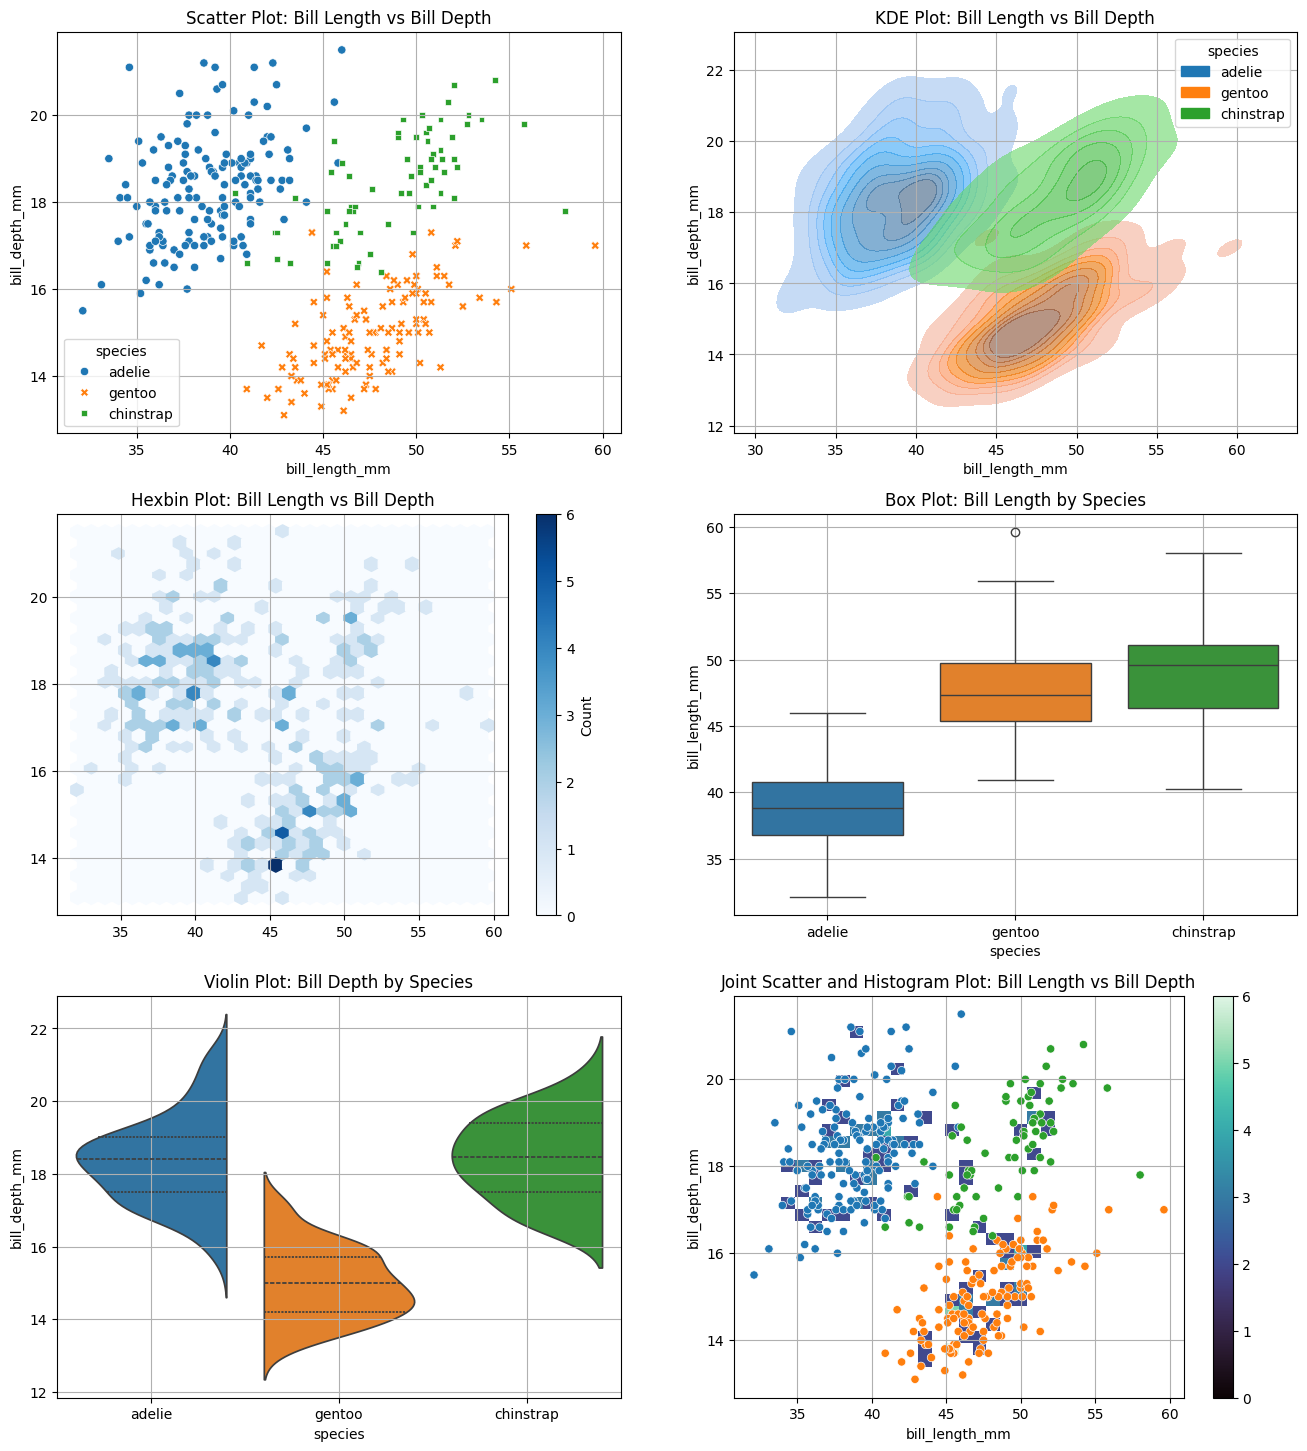

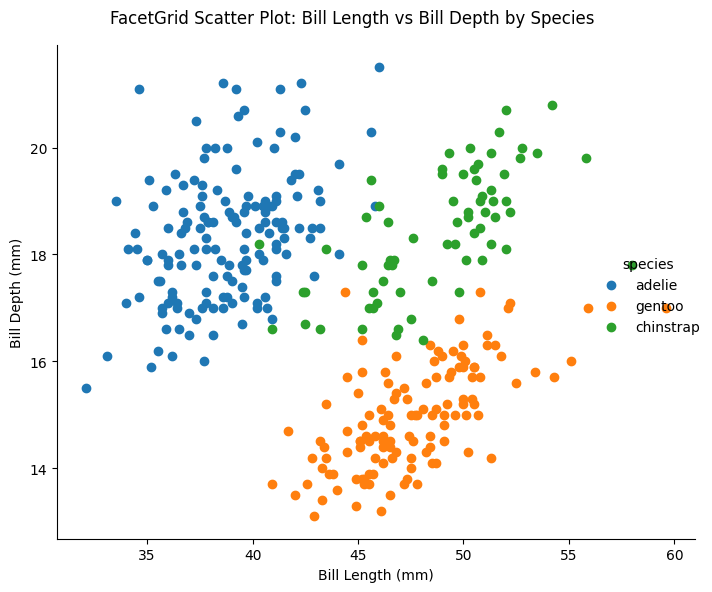

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with more readable spacing
plt.figure(figsize=(16, 24))

# 1. Scatter Plot
plt.subplot(4, 2, 1)
sns.scatterplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species')
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.grid(True)

# 2. KDE Plot (Kernel Density Estimate)
plt.subplot(4, 2, 2)
sns.kdeplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True, alpha=0.6)
plt.title('KDE Plot: Bill Length vs Bill Depth')
plt.grid(True)

# 3. Hexbin Plot
plt.subplot(4, 2, 3)
plt.hexbin(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Bill Length vs Bill Depth')
plt.grid(True)

# 4. Box Plot
plt.subplot(4, 2, 4)
sns.boxplot(data=df_cleaned, x='species', y='bill_length_mm', hue='species')
plt.title('Box Plot: Bill Length by Species')
plt.grid(True)

# 5. Violin Plot
plt.subplot(4, 2, 5)
sns.violinplot(data=df_cleaned, x='species', y='bill_depth_mm', hue='species', split=True, inner="quart")
plt.title('Violin Plot: Bill Depth by Species')
plt.grid(True)

# 6. Joint Plot (Scatter with histograms)
plt.subplot(4, 2, 6)
sns.histplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', bins=30, pthresh=.1, cmap="mako", cbar=True)
sns.scatterplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species', legend=False)
plt.title('Joint Scatter and Histogram Plot: Bill Length vs Bill Depth')
plt.grid(True)

# 7. FacetGrid Plot
g = sns.FacetGrid(df_cleaned, hue='species', height=6)
g.map(plt.scatter, 'bill_length_mm', 'bill_depth_mm')
g.add_legend()
g.fig.suptitle('FacetGrid Scatter Plot: Bill Length vs Bill Depth by Species')
g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()


#### 8. **Pair Plot**:
- Diagonal: Shows the distribution of each variable.
- Off-Diagonal: Shows scatter plots between each pair of features, making it easy to spot relationships between them.

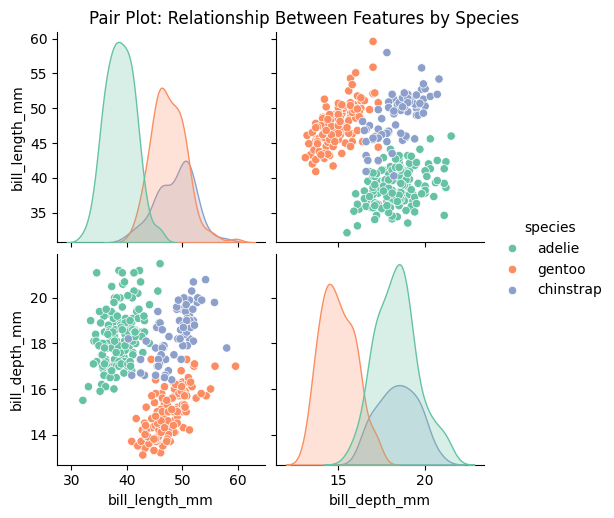

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot: Visualizing pairwise relationships between features
sns.pairplot(df_cleaned, hue='species', vars=['bill_length_mm', 'bill_depth_mm'], palette='Set2')
plt.suptitle('Pair Plot: Relationship Between Features by Species', y=1.02)
plt.show()

#### **Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)**

In [63]:
unique_combinations = df_cleaned.groupby(['species', 'island']).size().reset_index().rename(columns={0: 'count'})
print("Unique combinations of species and island:")
print(unique_combinations)

Unique combinations of species and island:
     species     island  count
0     adelie     biscoe     44
1     adelie      dream     56
2     adelie  torgersen     51
3  chinstrap      dream     68
4     gentoo     biscoe    123


In [64]:
# Group by species and island, and calculate the maximum flipper_length_mm for each combination
max_flipper_lengths = df_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

print("Maximum flipper length for each species and island combination:")
print(max_flipper_lengths)

max_flipper_by_island = max_flipper_lengths.loc[max_flipper_lengths.groupby('island')['flipper_length_mm'].idxmax()]

print("\nSpecies with the longest flippers on each island:")
print(max_flipper_by_island)

Maximum flipper length for each species and island combination:
     species     island  flipper_length_mm
0     adelie     biscoe              203.0
1     adelie      dream              208.0
2     adelie  torgersen              210.0
3  chinstrap      dream              212.0
4     gentoo     biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     gentoo     biscoe              231.0
3  chinstrap      dream              212.0
2     adelie  torgersen              210.0


#### **Q8: Perform z-score normalization on this dataset. (code)**

#### **What is Z-Score Normalization?**
Z-score normalization, also known as **standardization**, is a method of transforming features in a dataset so that they have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, regardless of their original range.

The **Z-score formula** is:

$ Z = \frac{X - \mu}{\sigma} $

Where:
- $X$ is the individual data point.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.

Z-score normalization centers the data around 0 and scales the values according to the spread (variance) of the data. The result is a dataset where each feature contributes equally to models that rely on distances or gradients.

- Applying the custom Z-score: The function is applied to a copy of `df_cleaned`, resulting in a new dataset `df_normalized` where each numerical column has a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale.

#### **Why Use Z-Score Normalization?**

1. **Uniform Scaling Across Features**:
   - Different features in a dataset might have different ranges. For example, one feature might range from 0 to 100, while another ranges from 0 to 1. Algorithms that rely on distance (e.g., K-Nearest Neighbors, SVM) or gradient-based optimization (e.g., neural networks) can be heavily influenced by features with larger ranges.
   - Z-score normalization rescales all features so that they have the same mean and variance, allowing algorithms to treat them equally.

2. **Handling Different Units**:
   - When features in a dataset are measured in different units (e.g., length in centimeters and weight in kilograms), the varying magnitudes can affect model performance. Z-score normalization converts all features to unitless, standardized values, ensuring that the model treats all features equally.


In [65]:
def custom_z_score_normalization(df, columns):
    for col in columns:
        mean_col = df[col].mean()
        std_col = df[col].std()
        df[col] = (df[col] - mean_col) / std_col
    return df

# Perform Z-score normalization using custom function
df_normalized = custom_z_score_normalization(df_cleaned.copy(), numerical_columns)

# Display the first few rows of the normalized dataset
print("\nCustom Z-score normalized dataset:")
print(df_normalized.head())



Custom Z-score normalized dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  adelie  torgersen       -0.881554       0.784300          -1.416272   
1  adelie  torgersen       -0.808483       0.126003          -1.060696   
2  adelie  torgersen       -0.662343       0.429833          -0.420660   
3  adelie  torgersen       -1.319975       1.088129          -0.562890   
4  adelie  torgersen       -0.845018       1.746426          -0.776236   

   body_mass_g     sex  
0    -0.468158    male  
1    -0.423485  female  
2    -0.914894  female  
3    -0.736200  female  
4    -0.557505    male  
